## 이미지 분류 모델을 이용한 파이썬 프로그램 만들어보기
---
파이썬(Python) 프로그래밍, 그중에서도 딥러닝을 배워본다면 이미지 분류 모델을 구현해볼 때가 있습니다. 간단하게는 강아지와 팬더를 구분하는 모델부터, 조금 복잡하게는 동물의 종류를 대여섯가지로 늘리는 등의 확장을 하는 방법으로 말이죠.  
</p></br></br>


그런데, 딥러닝 모델을 만들거나 편집하는 능력 없이도 간편하게 이미지 분류 모델을 구현할 수 있습니다. 바로 허깅페이스(Hugging Face) 트랜스포머(Transformers) 패키지를 사용하는 방법이지요.  
</p></br></br>


이번에는 이미지 분류(Image Classification) 모델을 이용해서 사진 속의 동물을 흉내내는 프로그램을 만들어 보도록 하겠습니다. 여기에서는 구글에서 개발한 [vit-base-patch16-224 모델](https://huggingface.co/google/vit-base-patch16-224)을 이용해 보도록 하겠습니다. 동물뿐만 아니라 다양한 사물도 구분할 수 있는 이미지 분류 모델이랍니다.  
</p></br></br>


예시를 위해서 고양이 이미지를 하나 골라서 파이썬 이미지 분류 모델에 입력시켜 보도록 하겠습니다. 제가 사용한 고양이 이미지를 다운로드하거나, 아니면 마음에 드는 고양이 이미지 하나를 고른 뒤 입력해 보세요.  
</p></br></br>



In [1]:
# 패키지 및 모델 불러오기
from transformers import pipeline
clf = pipeline(task='image-classification', model='google/vit-base-patch16-224')

In [2]:
# 고양이 이미지 입력
clf('./cat1.webp')

[{'score': 0.4910831153392792, 'label': 'Egyptian cat'},
 {'score': 0.25778698921203613, 'label': 'tiger cat'},
 {'score': 0.22977344691753387, 'label': 'tabby, tabby cat'},
 {'score': 0.003368305740877986, 'label': 'lynx, catamount'},
 {'score': 0.001327012898400426, 'label': 'Siamese cat, Siamese'}]

</p></br></br>


분류모델이 입력된 이미지에서 유추되는 상위 5개 분류를 골라서 알려준것을 확인할 수 있습니다. 4번째쯤에 스라소니가 섞여있기는 하지만, 점수가 0.003 정도이기 때문에 무시할 수 있을만하다고 가정하면 거의 완벽하게 고양이라고 판단한 것을 알 수가 있습니다. 고양이의 아종을 분류하는건 잘 못하는 편이지만, 이정도면 우리가 목표로 한 동물 흉내내기 프로그램을 구현하는데 무리가 없을 듯합니다. 그러면 사진 속의 동물을 확인하고, 이를 흉내내도록 프로그램을 수정해 보도록 하겠습니다.  
</p></br></br>



In [3]:
# 모델 불러오기
from transformers import pipeline
clf = pipeline(task='image-classification', model='google/vit-base-patch16-224')

'''
아래는 이미지 업로드 버튼 만들기용 코드입니다.
만약 다른 방법으로 이미지를 선택하려면
이 부분을 지우고 img라는 변수가
이미지를 받을 수 있도록 작성해주세요.
'''
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image
import io
import matplotlib.pyplot as plt

img = FileUpload(multile=False)
display(img)

FileUpload(value={}, description='Upload')

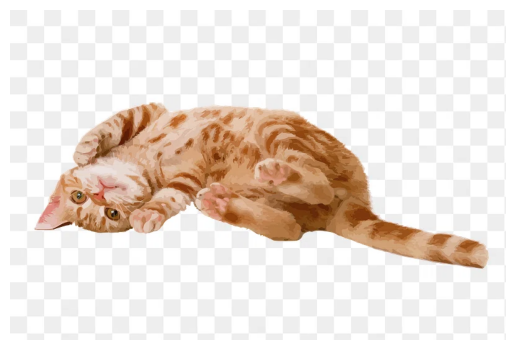

야생의 고양이가 애옹 하고 울부짖었다!


In [4]:
# 업로드한 이미지 열기
for name, file in img.value.items():
    input_img = io.BytesIO(file['content'])
    img = Image.open(input_img)

# 이미지 시각화
plt.imshow(img)
plt.axis('off')
plt.show()

# 가장 점수가 높은 대상의 label 알아보기
animal = clf(img)
animal = animal[0]['label']

# 동물에 따른 반응 구현하기
if 'cat' in animal.lower():
    print('야생의 고양이가 애옹 하고 울부짖었다!')
elif 'corgi' in animal.lower():
    print('멍멍으르렁왈왈!')
else:
    print(f'입력된 사진에는 {animal}가 있는 모양이네요!')

</p></br></br>


이 프로그램에는 단순하게 입력된 사진이 고양이인지, 웰시코기인지를 구분해 각 종류별로 안내문을 출력하고, 그 외의 분류는 분류값을 알려주는 형식으로 코드가 짜여 있습니다. 이 프로그램을 수정해서 조금 더 정교한 반응을 주거나, 더 많은 동물이나 사물을 구분할 수 있도록 한다면 제법 재미있는 프로그램을 만들 수 있지 않을까요?